In [48]:
import pandas as pd
import numpy as np
import json
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix

from MiniAutoML import MiniAutoML

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
X_url = 'https://raw.githubusercontent.com/woznicak/2025Z-AutoML/refs/heads/main/projects/project2/example_data/X.csv'
y_url = 'https://raw.githubusercontent.com/woznicak/2025Z-AutoML/refs/heads/main/projects/project2/example_data/y.csv'
X = pd.read_csv(X_url)
y = pd.read_csv(y_url)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
MODEL_CONFIG_FILE = 'models.json'

print(f"Wczytywanie konfiguracji z: {MODEL_CONFIG_FILE}")

with open(MODEL_CONFIG_FILE, 'r') as f:
    config_list = json.load(f)

print(f"Załadowano {len(config_list)} modeli.")
print(config_list)


automl = MiniAutoML(config_list)

Wczytywanie konfiguracji z: best_models.json
Załadowano 50 modeli.
[{'name': 'model_0', 'class': 'sklearn.neighbors.KNeighborsClassifier', 'params': {'weights': 'distance', 'p': 1, 'n_neighbors': 23}}, {'name': 'model_1', 'class': 'lightgbm.LGBMClassifier', 'params': {'learning_rate': 0.19212959255386386, 'colsample_bytree': 0.8391599915244341, 'subsample': 0.8083337040103294, 'min_child_samples': 76, 'num_leaves': 230, 'n_estimators': 561}}, {'name': 'model_2', 'class': 'lightgbm.LGBMClassifier', 'params': {'learning_rate': 0.22648248189516837, 'subsample': 0.7783331011414365, 'n_estimators': 120, 'min_child_samples': 76, 'num_leaves': 118, 'colsample_bytree': 0.749816047538945}}, {'name': 'model_3', 'class': 'lightgbm.LGBMClassifier', 'params': {'min_child_samples': 39, 'learning_rate': 0.05782029066113448, 'colsample_bytree': 0.679536961635522, 'num_leaves': 138, 'subsample': 0.6296178606936361, 'n_estimators': 388}}, {'name': 'model_4', 'class': 'lightgbm.LGBMClassifier', 'params':

In [51]:
automl = MiniAutoML(config_list)

In [52]:
automl.fit(X_train, y_train)


========== MiniAutoML: START FIT ==========
[STEP 0] Input validation
  Samples: 2784, Raw features: 16
[STEP 1] Target cleaned | Samples left: 2784
[STEP 1b] Fitting imputer
[STEP 2] Detecting outliers (IsolationForest)
  Removed outliers: 56
  Samples after outlier removal: 2728
[STEP 3] Feature selection
  Start features: 22
  After VarianceThreshold: 21
  Final selected features: 21
[STEP 4] Scaling features (MinMaxScaler)
[STEP 5] Target encoding
  Classes: [False  True]
  Negative: False, Positive: True
[STEP 6] Model training (CV)
  Candidates: 50
  -> Training model: model_0
     CV balanced_accuracy: 0.5264
  -> Training model: model_1
     CV balanced_accuracy: 0.5482
  -> Training model: model_2
     CV balanced_accuracy: 0.5408
  -> Training model: model_3
     CV balanced_accuracy: 0.5448
  -> Training model: model_4
     CV balanced_accuracy: 0.5442
  -> Training model: model_5
     CV balanced_accuracy: 0.5370
  -> Training model: model_6
     CV balanced_accuracy: 0.54

<MiniAutoML(status='Fitted', candidates=50, best_cv_score=0.5638)>

In [53]:
print('automl.score:', automl.score)
print('BA:', balanced_accuracy_score(y_test, automl.predict(X_test)))

automl.score: 0.5637798051381688
BA: 0.5625527723050943


In [54]:
automl.fitted_models

[{'name': 'model_42',
  'score': 0.564023896436702,
  'runner': <MiniAutoML.SingleModelRunner at 0x29380ac4c70>},
 {'name': 'model_33',
  'score': 0.5637962634269679,
  'runner': <MiniAutoML.SingleModelRunner at 0x29380ac7f10>},
 {'name': 'model_36',
  'score': 0.5636996422213972,
  'runner': <MiniAutoML.SingleModelRunner at 0x29380a46620>},
 {'name': 'model_40',
  'score': 0.5636996422213972,
  'runner': <MiniAutoML.SingleModelRunner at 0x29380ac5720>},
 {'name': 'model_44',
  'score': 0.56367958138438,
  'runner': <MiniAutoML.SingleModelRunner at 0x29380ac70a0>}]

In [55]:
[m['name'] for m in automl.fitted_models]

['model_42', 'model_33', 'model_36', 'model_40', 'model_44']

In [56]:
X_train_imputed = automl._transform_imputer(X_train)
X_test_imputed = automl._transform_imputer(X_test)

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_imputed, y_train)

print('BA (rf):', balanced_accuracy_score(y_test, rf.predict(X_test_imputed)))

BA (rf): 0.5603715170278638


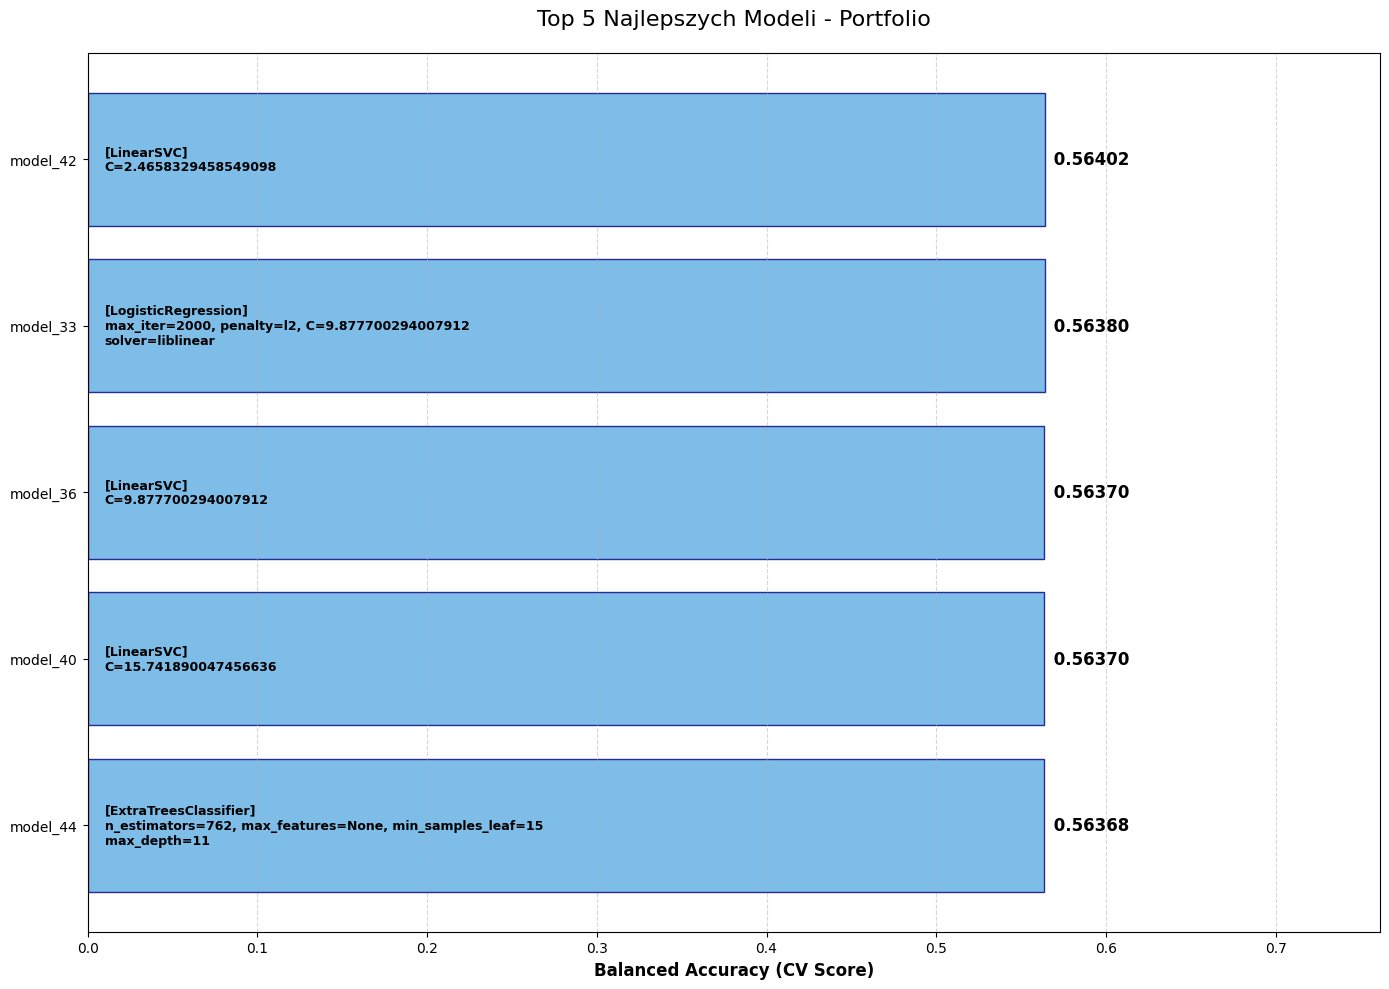


--- Szczegółowe wyniki ---


,Model Name,CV Score,Details
0,model_42,0.564024,[LinearSVC] C=2.4658329458549098
1,model_33,0.563796,"[LogisticRegression] max_iter=2000, penalty=l2..."
2,model_36,0.563700,[LinearSVC] C=9.877700294007912
3,model_40,0.563700,[LinearSVC] C=15.741890047456636
4,model_44,0.563680,"[ExtraTreesClassifier] n_estimators=762, max_f..."


In [58]:
import matplotlib.pyplot as plt

if automl.fitted_models:
    names = []
    scores = []
    labels_on_bars = []

    for m in automl.fitted_models:
        names.append(m['name'])
        scores.append(m['score'])

        runner = m['runner']
        config = runner.model_config 
        
        full_class_path = config['class']
        class_name = full_class_path.split('.')[-1]
        
        params = config.get('params', {})
        
        params_items = [f"{k}={v}" for k, v in params.items()]
        params_str = ""
        step = 3
        for i in range(0, len(params_items), step):
            chunk = params_items[i:i+step]
            params_str += ", ".join(chunk) + "\n"
        
        label = f"[{class_name}]\n{params_str.strip()}"
        labels_on_bars.append(label)


    fig, ax = plt.subplots(figsize=(14, len(names) * 2.0))
    
    bars = ax.barh(names, scores, color='#5DADE2', edgecolor='navy', alpha=0.8)
    
    ax.set_xlabel('Balanced Accuracy (CV Score)', fontsize=12, fontweight='bold')
    ax.set_title(f'Top {len(names)} Najlepszych Modeli - Portfolio', fontsize=16, pad=20)
    
    max_score = max(scores) if scores else 1.0
    ax.set_xlim(0, max_score * 1.35) 
    
    ax.invert_yaxis()
    ax.grid(axis='x', linestyle='--', alpha=0.5)

    for bar, score, label in zip(bars, scores, labels_on_bars):

        ax.text(score + 0.002, 
                bar.get_y() + bar.get_height()/2, 
                f" {score:.5f}", 
                va='center', ha='left', fontsize=12, fontweight='bold', color='black')
        

        ax.text(0.01, 
                bar.get_y() + bar.get_height()/2, 
                label, 
                va='center', ha='left', fontsize=9, color='black', fontweight='bold')

    plt.tight_layout()
    plt.show()
    
    print("\n--- Szczegółowe wyniki ---")
    df_results = pd.DataFrame({
        'Model Name': names,
        'CV Score': scores,
        'Details': [l.replace('\n', ' ') for l in labels_on_bars]
    })
    display(df_results)

else:
    print("Brak wytrenowanych modeli.")